# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bungu
Processing Record 2 of Set 1 | kabo
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | chumikan
Processing Record 5 of Set 1 | viransehir
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | narsaq
Processing Record 9 of Set 1 | xuddur
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | muisne
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | taltal
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | south valley
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | formoso do araguaia
City not found. Skipping...
Processi

Processing Record 36 of Set 4 | yeppoon
Processing Record 37 of Set 4 | usinsk
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | winnemucca
Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | suntar
Processing Record 42 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 4 | chiang khong
Processing Record 44 of Set 4 | broken hill
Processing Record 45 of Set 4 | buluang
Processing Record 46 of Set 4 | nesbyen
Processing Record 47 of Set 4 | coihaique
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | kaseda
Processing Record 0 of Set 5 | manzhouli
Processing Record 1 of Set 5 | isabela
Processing Record 2 of Set 5 | atar
Processing Record 3 of Set 5 | senekal
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | asfi
Processing Record 6 of Set 5 | bocana de paiwas
Processing Record 7 of Set 5 | nishihara
Processing Record 8 of Set 5 | beringovskiy
Processing Record 9 of Set 

Processing Record 27 of Set 8 | terrace bay
Processing Record 28 of Set 8 | poum
Processing Record 29 of Set 8 | mehamn
Processing Record 30 of Set 8 | hassleholm
Processing Record 31 of Set 8 | puerto escondido
Processing Record 32 of Set 8 | lope de vega
Processing Record 33 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 34 of Set 8 | nanakuli
Processing Record 35 of Set 8 | santa maria
Processing Record 36 of Set 8 | padang
Processing Record 37 of Set 8 | hostotipaquillo
Processing Record 38 of Set 8 | the valley
Processing Record 39 of Set 8 | camana
Processing Record 40 of Set 8 | matamoros
Processing Record 41 of Set 8 | havre-saint-pierre
Processing Record 42 of Set 8 | muzhi
Processing Record 43 of Set 8 | luvianos
Processing Record 44 of Set 8 | kahului
Processing Record 45 of Set 8 | arlit
Processing Record 46 of Set 8 | zlitan
Processing Record 47 of Set 8 | birjand
Processing Record 48 of Set 8 | nanortalik
Processing Record 49 of Set 8 | novobiryusinskiy

Processing Record 15 of Set 12 | baleshwar
Processing Record 16 of Set 12 | kavaratti
Processing Record 17 of Set 12 | boyolangu
Processing Record 18 of Set 12 | groningen
Processing Record 19 of Set 12 | aflu
City not found. Skipping...
Processing Record 20 of Set 12 | katobu
Processing Record 21 of Set 12 | esperance
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | ballina
Processing Record 24 of Set 12 | bradford
Processing Record 25 of Set 12 | waingapu
Processing Record 26 of Set 12 | labutta
City not found. Skipping...
Processing Record 27 of Set 12 | severomorsk
Processing Record 28 of Set 12 | goundam
Processing Record 29 of Set 12 | beroroha
Processing Record 30 of Set 12 | diego de almagro
Processing Record 31 of Set 12 | porto novo
Processing Record 32 of Set 12 | chantada
Processing Record 33 of Set 12 | along
Processing Record 34 of Set 12 | kudahuvadhoo
Processing Record 35 of Set 12 | benjamin hill
Processing Record 36 of Set 12 | pilot butte

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bungu,-7.6337,39.0582,77.38,55,21,8.61,TZ,1690006652
1,kabo,7.6994,18.6290,74.07,83,68,3.33,CF,1690006652
2,codrington,-38.2667,141.9667,55.98,72,97,8.19,AU,1690006652
3,chumikan,54.7183,135.3150,74.39,40,35,6.67,RU,1690006652
4,viransehir,37.2353,39.7631,99.03,12,0,3.85,TR,1690006653


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bungu,-7.6337,39.0582,77.38,55,21,8.61,TZ,1690006652
1,kabo,7.6994,18.6290,74.07,83,68,3.33,CF,1690006652
2,codrington,-38.2667,141.9667,55.98,72,97,8.19,AU,1690006652
3,chumikan,54.7183,135.3150,74.39,40,35,6.67,RU,1690006652
4,viransehir,37.2353,39.7631,99.03,12,0,3.85,TR,1690006653


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

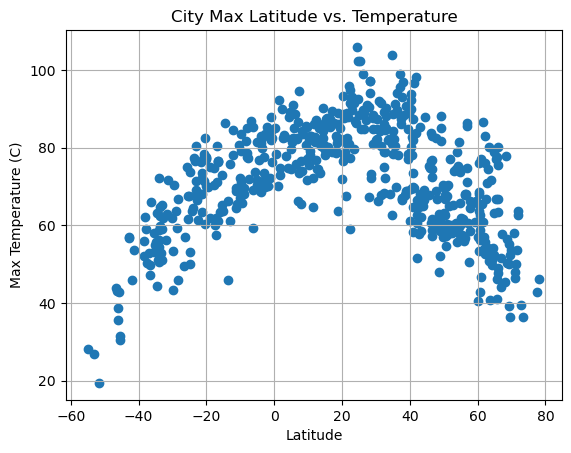

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

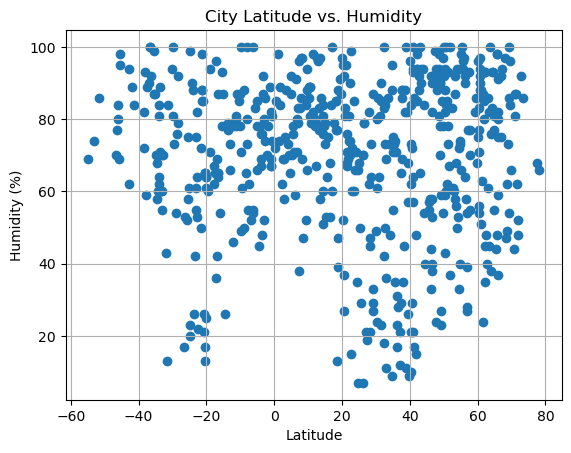

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

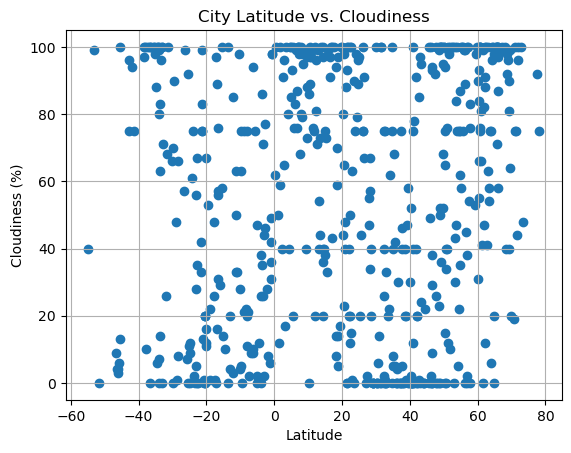

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

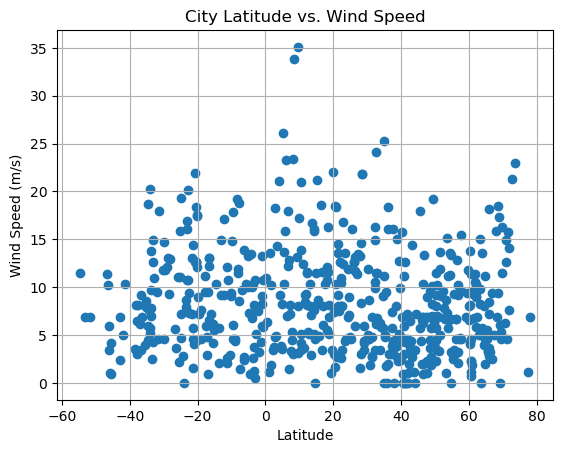

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print (f"The r-value is: {rvalue**2}")
    return line_eq

def formula(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kabo,7.6994,18.6290,74.07,83,68,3.33,CF,1690006652
3,chumikan,54.7183,135.3150,74.39,40,35,6.67,RU,1690006652
4,viransehir,37.2353,39.7631,99.03,12,0,3.85,TR,1690006653
6,narsaq,60.9167,-46.0500,46.62,88,66,1.88,GL,1690006653
7,xuddur,4.1213,43.8894,74.66,73,80,21.07,SO,1690006654


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bungu,-7.6337,39.0582,77.38,55,21,8.61,TZ,1690006652
2,codrington,-38.2667,141.9667,55.98,72,97,8.19,AU,1690006652
5,carnarvon,-24.8667,113.6333,73.76,23,0,19.30,AU,1690006653
9,punta arenas,-53.1500,-70.9167,26.92,74,99,6.85,CL,1690006654
12,avarua,-21.2078,-159.7750,68.05,88,75,5.75,CK,1690006655


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.41899334523538734


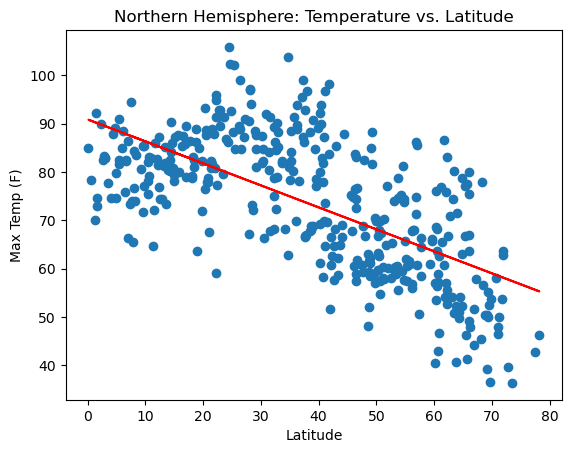

In [15]:
# Linear regression on Northern Hemisphere: Temperature vs. Latitude
plot = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
formula(plot, 0, 0)

plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-value is: 0.6132038962315604


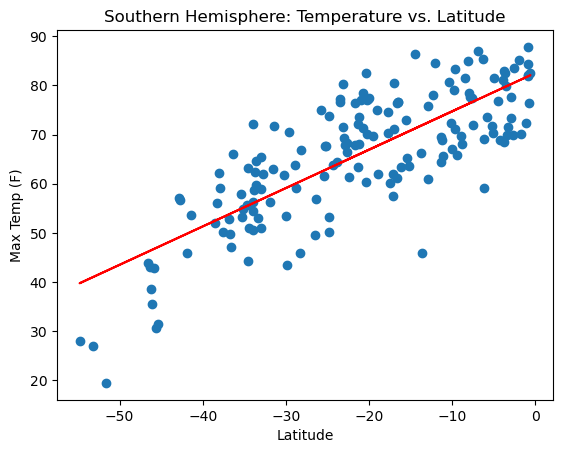

In [17]:
# Linear regression on Southern Hemisphere: Temperature vs. Latitude
plot = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
formula(plot, 0, 0)

plt.title("Southern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere: Temperature vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** In the Northern Hemisphere, temperature and latitude are negatively correlated. This means that the temperature decreases as the latitude rises. This makes sense since the higher you you go, the lower the temp tends to be. The opposite can be said for the southern hemisphere, which shows a positive correlation between temperature and latitude. You can see from the graph that as the latitide increases, so do the temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 1.1398856581505208e-05


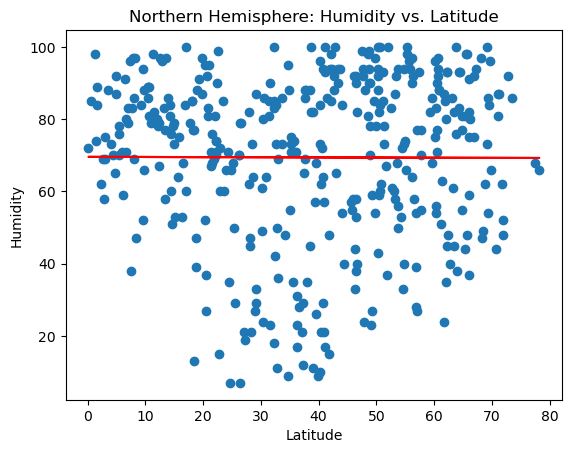

In [24]:
# Linear regression on Northern Hemisphere: Humidity vs. Latitude
plot = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
formula(plot, 0, 0)

plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere: Humidity vs. Latitude Linear Regression.png")

The r-value is: 0.005930042428603171


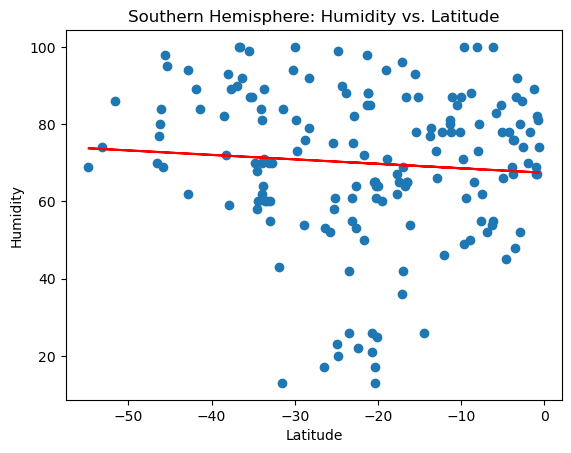

In [25]:
# Linear regression on Southern Hemisphere: Humidity vs. Latitude
plot = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
formula(plot, 0, 0)

plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere: Humidity vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** There does not seem to be a strong relationship between humidity and latitude, either in the southern hemisphere or the northern one.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0005850104796941466


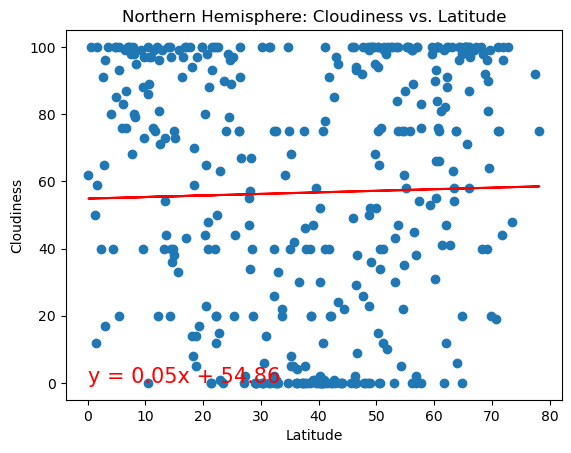

In [26]:
# Linear regression on Northern Hemisphere: Cloudiness vs. Latitude
plot = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
formula(plot, 0, 0)

plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere: Cloudiness vs. Latitude Linear Regression.png")

The r-value is: 0.04650044515842006


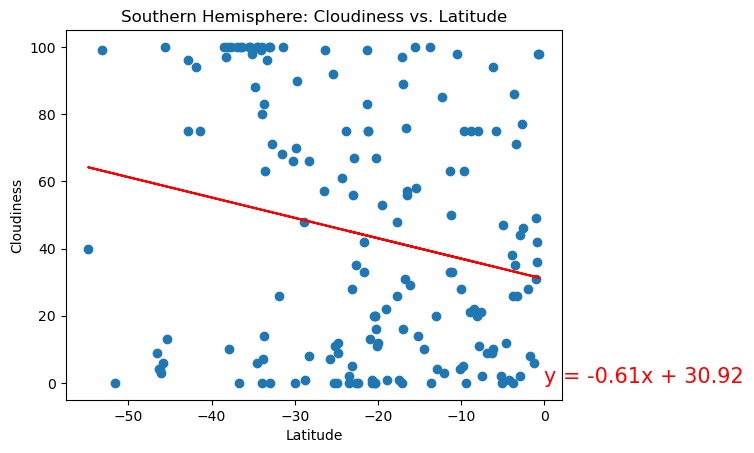

In [28]:
# Linear regression on Southern Hemisphere: Cloudiness vs. Latitude
plot = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
formula(plot, 0, 0)

plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere: Cloudiness vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** In the northern hemisphere, there does not seem to be a strong correlation between cloudiness and latitude. Howevew, in the southern hemisphere there does appear to be a weak negative correlation between cloudiness and latitide, as cloudiness decreases a bit as the latitide increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.027880388801131094


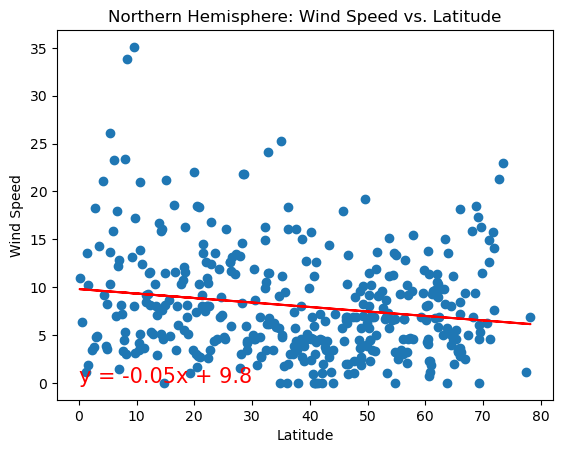

In [29]:
# Linear regression on Northern Hemisphere: Wind Speed vs. Latitude
plot = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
formula(plot, 0, 0)

plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere: Wind Speed vs. Latitude Linear Regression.png")

The r-value is: 0.0008957688831359729


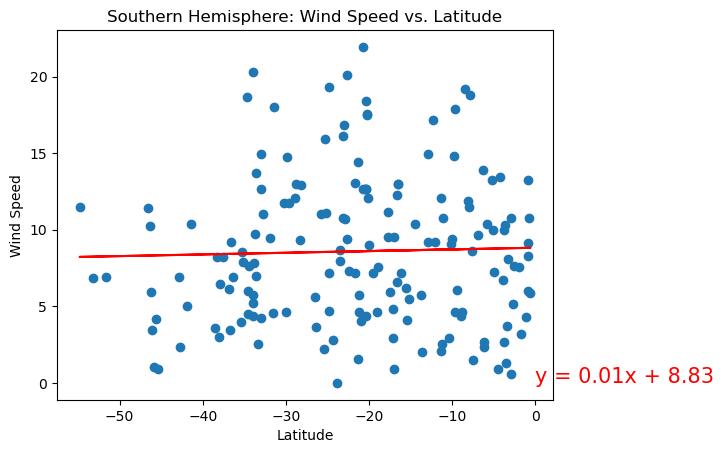

In [30]:
# Linear regression on Southern Hemisphere: Wind Speed vs. Latitude
plot = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
formula(plot, 0, 0)

plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere: Wind Speed vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** Neither the southern or northern hemisphere show a strong correlation between wind speed and latitude.